In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [4]:
from imblearn.under_sampling import NearMiss

In [5]:
# df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
# df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
# df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
# df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

df = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15])

# df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [6]:
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))


In [7]:
df['rainfall_tomorrow'] = df['rainfall'].shift(1)
df.dropna()
df.head

<bound method NDFrame.head of            date  min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  \
0    2010-01-01      43.0      55.0       0.0           15.0           15.0   
1    2010-01-02      35.0      53.0       0.0            5.0            7.0   
2    2010-01-03      43.0      48.0       0.0           14.0            9.0   
3    2010-01-04      36.0      48.0       0.0           15.0           14.0   
4    2010-01-05      30.0      49.0       0.0            9.0            5.0   
..          ...       ...       ...       ...            ...            ...   
360  2015-12-27      47.0      78.0       2.0           15.0           20.0   
361  2015-12-28      41.0      52.0       0.0           21.0           16.0   
362  2015-12-29      42.0      54.0       0.0            6.0            6.0   
363  2015-12-30      50.0      57.0       0.0           14.0            9.0   
364  2015-12-31      51.0      55.0       0.0           13.0           10.0   

     humidity9am  hum

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 364
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2172 non-null   object 
 1   min_temp           2172 non-null   float64
 2   max_temp           2172 non-null   float64
 3   rainfall           2172 non-null   float64
 4   wind_speed9am      2172 non-null   float64
 5   wind_speed3pm      2172 non-null   float64
 6   humidity9am        2172 non-null   float64
 7   humidity3pm        2172 non-null   float64
 8   pressure9am        2172 non-null   float64
 9   pressure3pm        2172 non-null   float64
 10  cloud9am           2172 non-null   object 
 11  cloud3pm           2172 non-null   object 
 12  temp9am            2172 non-null   float64
 13  temp3pm            2172 non-null   float64
 14  rain_today         2172 non-null   object 
 15  rain_tomorrow      2172 non-null   int64  
 16  rainfall_tomorrow  2171 n

In [9]:
rainfall = df['rainfall'].to_numpy()


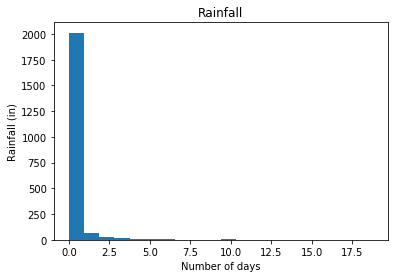

In [10]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

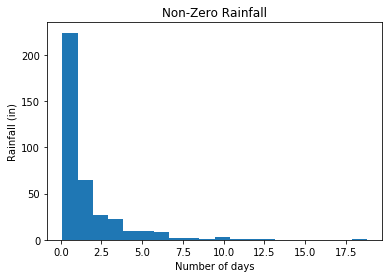

In [11]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

In [12]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [13]:
test

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow,rainfall_tomorrow
4,2010-01-05,30.0,49.0,0.0,9.0,5.0,61.0,37.0,30.47,30.34,Fair,Partly Cloudy,35.0,48.0,No,0,0.0
251,2015-09-09,76.0,89.0,0.0,5.0,10.0,74.0,76.0,29.89,29.84,Mostly Cloudy,Thunder,85.0,80.0,No,1,0.0
285,2012-10-12,70.0,87.0,0.0,7.0,12.0,79.0,58.0,30.14,30.06,Fair,Partly Cloudy,78.0,83.0,No,0,0.0
121,2015-05-02,59.0,81.0,0.0,6.0,8.0,59.0,39.0,30.04,29.97,Fair,Partly Cloudy,74.0,80.0,No,0,0.0
186,2015-07-06,79.0,90.0,0.0,15.0,15.0,67.0,61.0,30.04,29.99,Mostly Cloudy,Mostly Cloudy,87.0,89.0,No,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2014-07-12,75.0,93.0,0.0,0.0,0.0,69.0,47.0,30.12,30.04,Partly Cloudy,Mostly Cloudy,85.0,93.0,No,1,0.0
11,2013-01-12,66.0,75.0,0.0,13.0,18.0,87.0,82.0,29.83,29.72,Cloudy,Cloudy,73.0,74.0,No,1,0.0
46,2013-02-16,41.0,61.0,0.0,9.0,10.0,41.0,22.0,30.40,30.26,Fair,Fair,47.0,61.0,No,0,0.0
211,2013-07-31,74.0,97.0,0.0,9.0,7.0,65.0,40.0,30.06,29.96,Partly Cloudy,Partly Cloudy,86.0,97.0,No,0,0.0


In [14]:
train

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow,rainfall_tomorrow
207,2014-07-27,77.0,95.0,0.0,10.0,9.0,70.0,49.0,30.03,29.97,Partly Cloudy,Partly Cloudy,86.0,95.0,No,0,0.0
351,2010-12-18,45.0,58.0,0.0,12.0,6.0,61.0,37.0,30.10,30.00,Cloudy,Fair,47.0,58.0,No,0,0.0
260,2013-09-18,78.0,92.0,0.0,10.0,15.0,70.0,55.0,29.95,29.88,Mostly Cloudy,Mostly Cloudy,86.0,90.0,No,1,0.0
46,2012-02-16,57.0,68.0,0.0,7.0,7.0,90.0,68.0,30.09,30.03,Cloudy,Cloudy,61.0,66.0,No,1,0.2
146,2012-05-26,75.0,89.0,0.0,6.0,7.0,71.0,46.0,30.01,29.95,Mostly Cloudy,Partly Cloudy,82.0,89.0,No,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2010-02-24,36.0,54.0,0.0,9.0,16.0,65.0,35.0,30.22,30.13,Fair,Fair,41.0,54.0,No,0,0.1
190,2011-07-10,79.0,96.0,0.0,7.0,13.0,63.0,44.0,29.94,29.88,Partly Cloudy,Mostly Cloudy,87.0,96.0,No,0,0.0
71,2010-03-13,49.0,72.0,0.0,9.0,18.0,41.0,26.0,29.87,29.78,Fair,Fair,60.0,72.0,No,0,0.0
230,2013-08-19,73.0,91.0,0.0,7.0,10.0,61.0,42.0,29.99,29.92,Fair,Mostly Cloudy,85.0,90.0,No,0,0.0


In [67]:
x_train = train[[ # 'min_temp', 
                # 'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                # 'temp9am', 
                # 'temp3pm',
                'rainfall'
                ]]
# x_train = train[['humidity3pm', 'pressure3pm']]

y_train = train[['rain_tomorrow']]

In [68]:
nm = NearMiss()
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [26]:
# y_train = train[['rain_tomorrow']]

In [69]:
x_test = test[[ # 'min_temp', 
                # 'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                # 'temp9am', 
                # 'temp3pm',
                'rainfall'
                ]]

y_test = test[['rain_tomorrow']]

In [75]:
scaler = MinMaxScaler().fit(df[[ 
                # 'min_temp', 
                # 'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                # 'temp9am', 
                # 'temp3pm',
                'rainfall'
                ]])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [70]:
# model = RandomForestClassifier(n_estimators = 100) 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = model.predict(x_test)

In [72]:
print('R squared: {:.2f}'.format(model.score(x_train,y_train)*100)) #train

R squared: 51.88


In [73]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100)) #test  

R squared: 41.38


In [74]:
metrics.accuracy_score(y_test, y_pred) 

0.41379310344827586